#Assignment 5.2: Multimodal Application Demo

**Description of the Application**

This Python-based app uses a pretrained multimodal model—BLIP (Base) from Salesforce—to generate a descriptive caption for an image input.

* Input: An image file (JPG or PNG)
* Output: A textual caption that describes the image

# How the Model Works
**Vision Encoder:** A Vision Transformer (ViT) processes the image and extracts features.

**Text Decoder:** A Transformer-based decoder uses cross-attention to generate a caption conditioned on the visual input.

**Pretraining Tasks:** BLIP is trained on image-text matching, captioning, and question answering, making it capable of generating natural language from visual input.

In [10]:
!pip install transformers pillow torch gradio

In [11]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Load BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Load and preprocess image
image_path = "/content/Sample.jpeg"
image = Image.open(image_path).convert('RGB')

# Generate caption
inputs = processor(images=image, return_tensors="pt")
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)

print("Generated Caption:", caption)


Generated Caption: a man holding a parrot


In [13]:
import gradio as gr
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Load the BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Caption generation function
def generate_caption(image):
    inputs = processor(images=image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption

# Launch Gradio interface
gr.Interface(
    fn=generate_caption,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="BLIP Image Captioning",
    description="Upload an image and BLIP will generate a caption for it."
).launch()
debug=True


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6b14c37591a5613e3a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


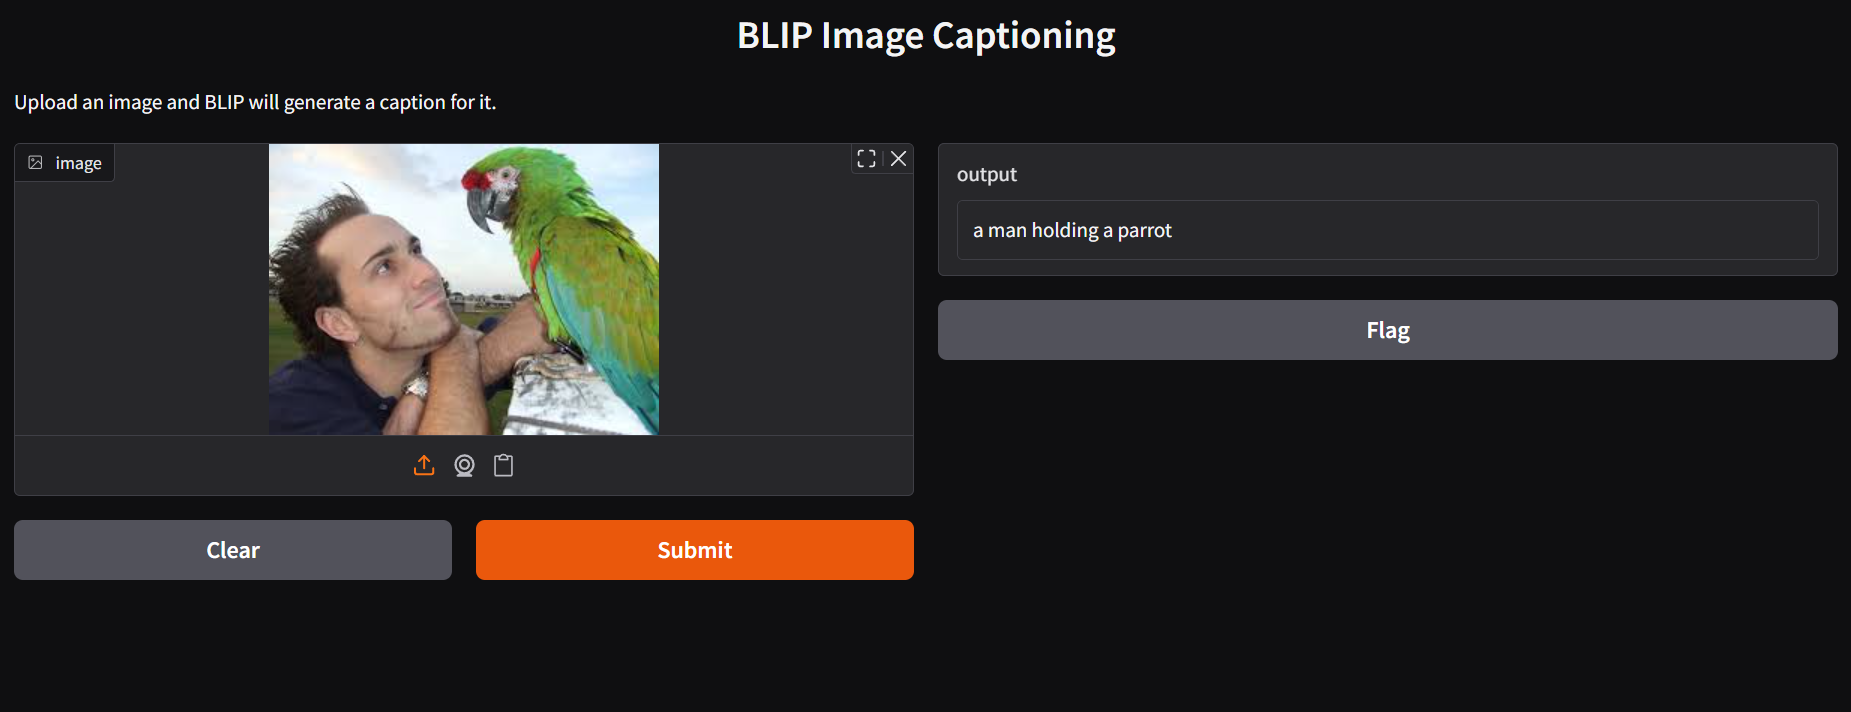